# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data.

## PART 1:
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [2]:
!pip install --upgrade scikit-learn

In [47]:
#I've been using googel colab to run my HW since i broke my jupyter notebooks/lab and can't run anything on there for right now, hope that is cool

# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split

#######got an error here, needed to switch out confusion matrix import for these
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
########

# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

#vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [3]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape

df = pd.read_csv('/content/drive/MyDrive/CTP_data/20-newsgroups.csv')
df.shape

(11314, 4)

In [4]:
df.head(5)

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [5]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [6]:
any(df.duplicated())

False

In [7]:
# 4. Find class balances, print out how many of each topic_category there are.
target_column = 'topic_category'

class_counts = df[target_column].value_counts()

class_counts

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function.
    
    
2. Make a function that removes all punctuation.
    * Do a sanity check by feeding in a test sentence into the function.
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function.
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words.


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline.
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column.

In [8]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def lower_case(text):
  return text.lower()

print(lower_case(test_string))


this is a sentence with lots of caps.


In [9]:
# 2. Make a function that removes all punctuation.


test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def remove_punc(text):
  punctuation = string.punctuation

  new_text = text.translate(str.maketrans('','', punctuation))

  return new_text

print(remove_punc(test_string))

This is a sentence 50 With lots of punctuation  other things


In [10]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_stopwords(text):
    # Break the sentence down into a list of words
    words = word_tokenize(text)

    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:

        # Check if word is not in stopwords
        if word not in stopwords:

            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

print(remove_stopwords(test_string))

This sentence ! With different stopwords added .


In [11]:
# 4. EXTRA CREDIT: Make a function that stemms all words.

test_string = 'I played and started playing with players and we all love to play with plays'



In [12]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.


test_string = 'I played and started playing with players and we all love to play with plays'

def text_pipeline(text):

  modified_1 = lower_case(text)

  modified_2 = remove_punc(modified_1)

  modified_3 = remove_stopwords(modified_2)

  return modified_3

print(text_pipeline(test_string))

played started playing players love play plays


In [14]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column.
df['modfied-message']= df['message'].apply(text_pipeline)

df

,id,message,topic,topic_category,modfied-message
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu wheres thing subject car nntpp...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thomas e willis subject ...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamber joe green subject weitek p9000 org...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowell subject...
...,...,...,...,...,...
11309,11309,From: jim.zisfein@factory.com (Jim Zisfein) \r...,13,sci.med,jimzisfeinfactorycom jim zisfein subject migra...
11310,11310,From: ebodin@pearl.tufts.edu\r\nSubject: Scree...,4,comp.sys.mac.hardware,ebodinpearltuftsedu subject screen death mac p...
11311,11311,From: westes@netcom.com (Will Estes)\r\nSubjec...,3,comp.sys.ibm.pc.hardware,westesnetcomcom estes subject mounting cpu coo...
11312,11312,From: steve@hcrlgw (Steven Collins)\r\nSubject...,1,comp.graphics,stevehcrlgw steven collins subject sphere 4 po...


# Text Vectorization

1. Define your `X` and `y` data.


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer.
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [15]:
# 1. Define your `X` and `y` data.

X = df['modfied-message']

y = df['topic_category']


In [20]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()


In [21]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X)

TfidfVectorizer()

In [23]:
# 4. Transform your X data using your fitted vectorizer.

X = vectorizer.transform(X)


In [24]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

X.shape

(11314, 138591)

# Split your data into Training and Testing data.

In [25]:
# Split our data into testing and training like always.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents.

1. Initalize an empty model.
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you.

In [26]:
# 1. Initalize an empty model.

model = MultinomialNB(alpha=.05)


In [27]:
# Fit our model with our training data.

model.fit(X_train, y_train)


MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data.
2. Print the accuracy of the model.
3. Print the confusion matrix of our predictions.
4. Using `classification_report` print the evaluation results for all the classes.



In [28]:
# 1. Make new predictions of our testing data.

y_pred = model.predict(X_test)


In [ ]:
# 2. Print the accuracy of the model.
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'alt.atheism'),
  Text(1, 0, 'comp.graphics'),
  Text(2, 0, 'comp.os.ms-windows.misc'),
  Text(3, 0, 'comp.sys.ibm.pc.hardware'),
  Text(4, 0, 'comp.sys.mac.hardware'),
  Text(5, 0, 'comp.windows.x'),
  Text(6, 0, 'misc.forsale'),
  Text(7, 0, 'rec.autos'),
  Text(8, 0, 'rec.motorcycles'),
  Text(9, 0, 'rec.sport.baseball'),
  Text(10, 0, 'rec.sport.hockey'),
  Text(11, 0, 'sci.crypt'),
  Text(12, 0, 'sci.electronics'),
  Text(13, 0, 'sci.med'),
  Text(14, 0, 'sci.space'),
  Text(15, 0, 'soc.religion.christian'),
  Text(16, 0, 'talk.politics.guns'),
  Text(17, 0, 'talk.politics.mideast'),
  Text(18, 0, 'talk.politics.misc'),
  Text(19, 0, 'talk.religion.misc')])

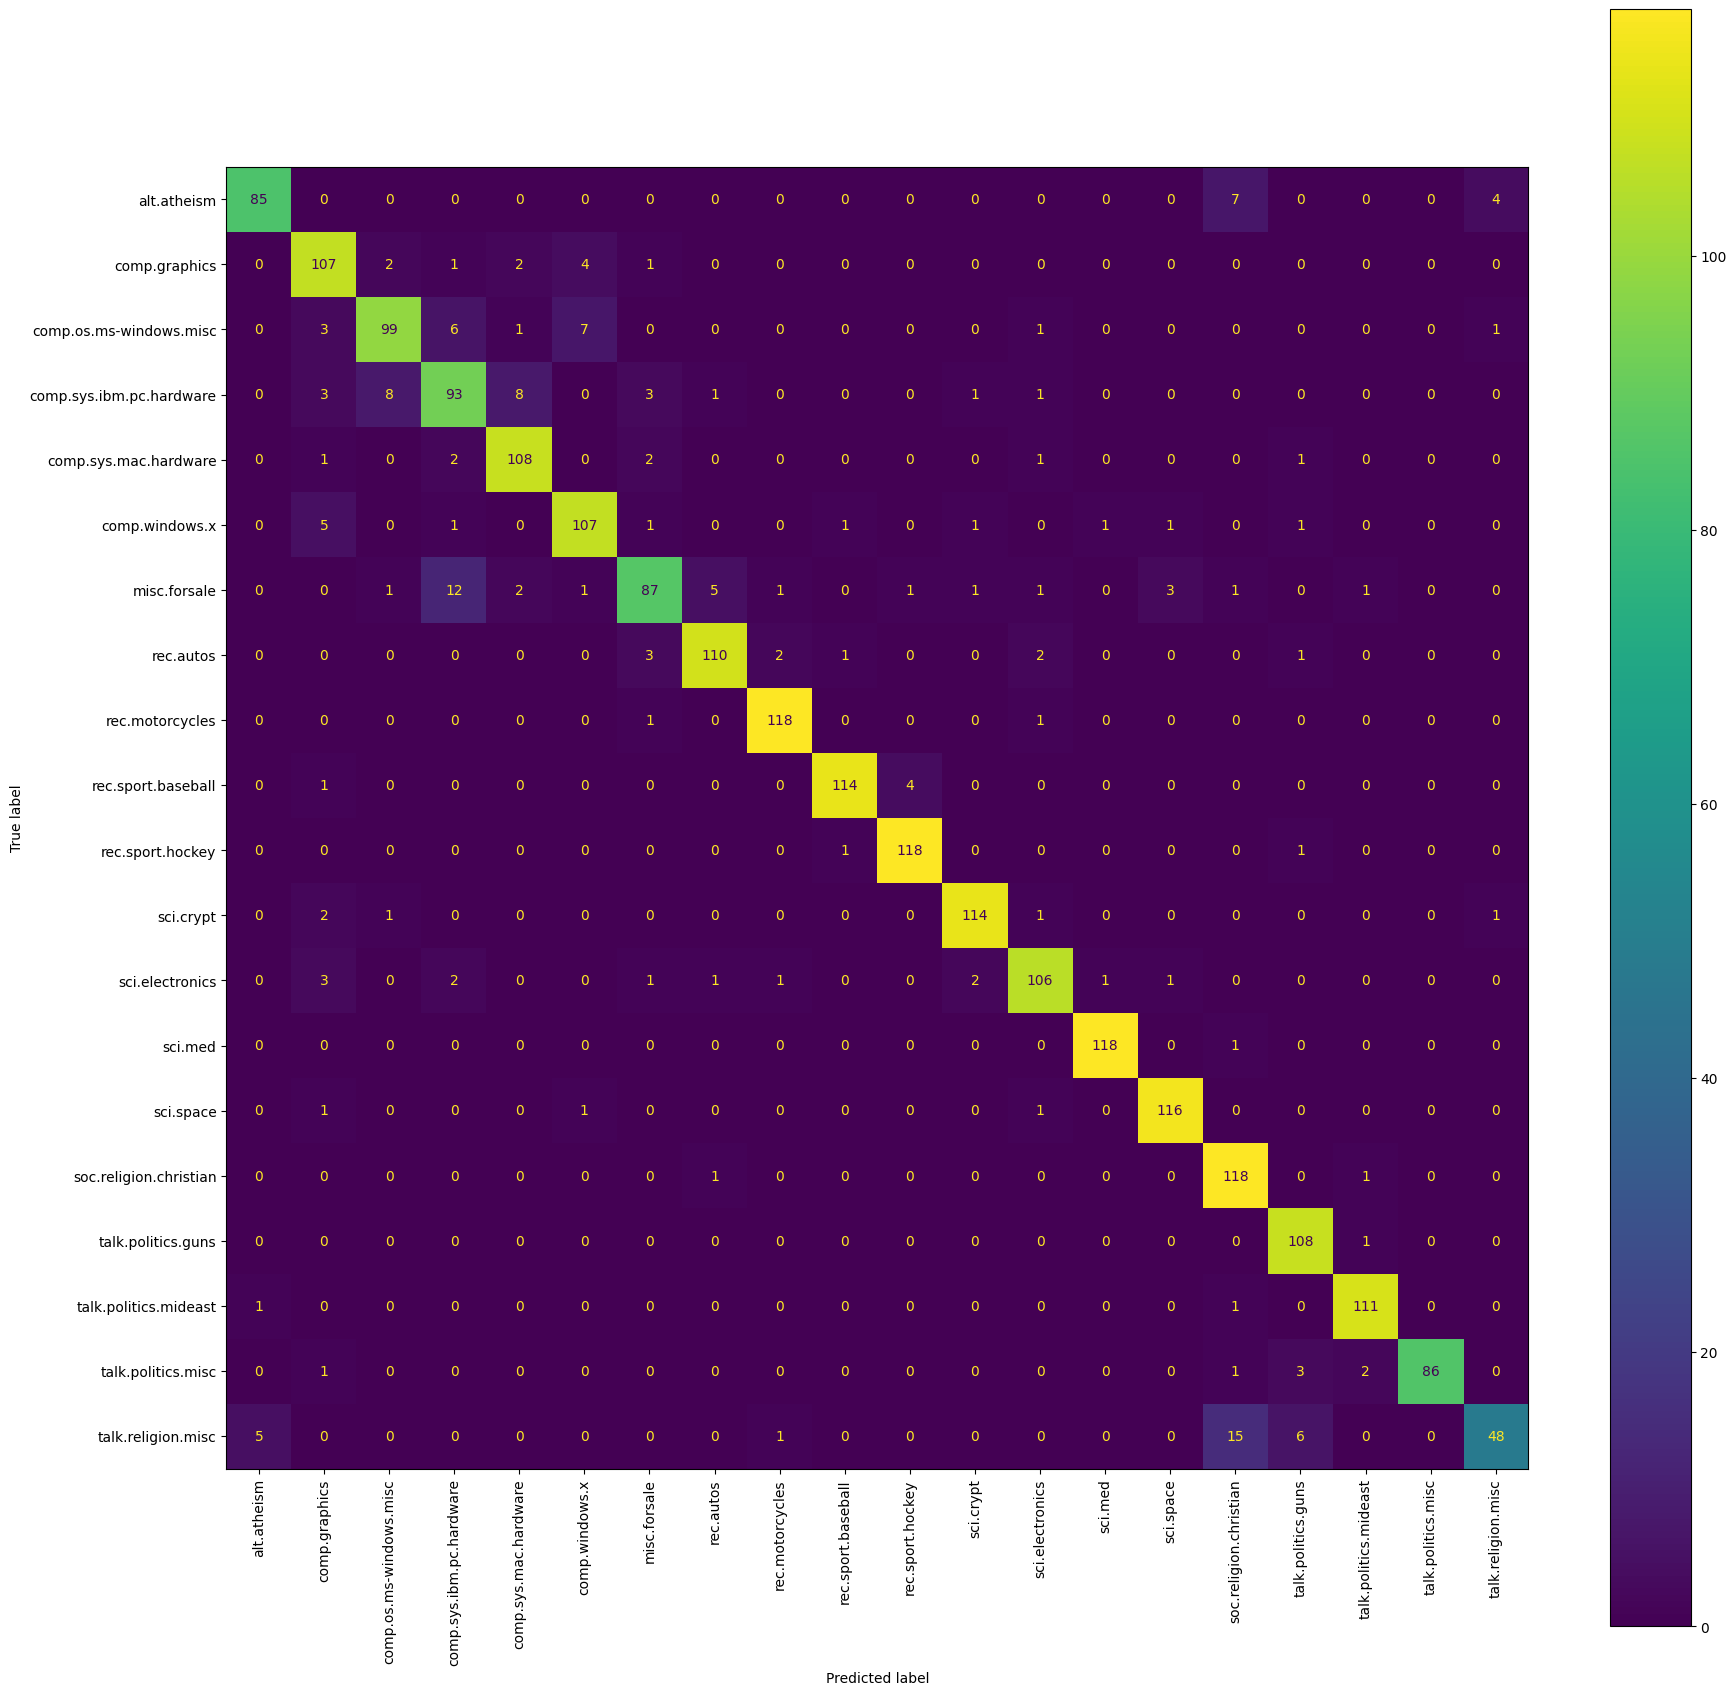

In [32]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21,21))
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
plt.xticks(rotation=90)

In [33]:
# 4. Using `classification_report` print the evaluation results for all the classes.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.89      0.91        96
           comp.graphics       0.84      0.91      0.88       117
 comp.os.ms-windows.misc       0.89      0.84      0.86       118
comp.sys.ibm.pc.hardware       0.79      0.79      0.79       118
   comp.sys.mac.hardware       0.89      0.94      0.92       115
          comp.windows.x       0.89      0.90      0.90       119
            misc.forsale       0.88      0.74      0.81       117
               rec.autos       0.93      0.92      0.93       119
         rec.motorcycles       0.96      0.98      0.97       120
      rec.sport.baseball       0.97      0.96      0.97       119
        rec.sport.hockey       0.96      0.98      0.97       120
               sci.crypt       0.96      0.96      0.96       119
         sci.electronics       0.92      0.90      0.91       118
                 sci.med       0.98      0.99      0.99       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns.
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`.
4. Print the prediction

In [34]:
my_sentence = 'The debate surrounding gun control policies often sparks intense discussions within the realm of politics, encapsulating varied perspectives on individual rights, public safety, and legislative measures.'

# 1. Apply the text pipeline to your sentence
new_text = text_pipeline(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([new_text])
# 3. Use the model to predict your new `X`.
prediction = model.predict(X)
# 4. Print the prediction
print(prediction)

['talk.politics.guns']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican.

Can you get an f1-score higher than %82

In [36]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('/content/drive/MyDrive/CTP_data/dem-vs-rep-tweets.csv')


df.head(5)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [37]:
df['cleaner_tweet'] = df['Tweet'].apply(text_pipeline)

df.head(5)

,Party,Handle,Tweet,cleaner_tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet proud s...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vista t...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurricane mar...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto thanks t...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season starts june 1st ...


In [38]:
X = df['cleaner_tweet']

y = df['Party']


In [39]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [40]:
#Split our data into testing and training like always.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [41]:
model = MultinomialNB(alpha=.05)

In [42]:
model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

In [43]:
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.811994


In [44]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.81      0.79      0.80      8414
  Republican       0.81      0.83      0.82      8878

    accuracy                           0.81     17292
   macro avg       0.81      0.81      0.81     17292
weighted avg       0.81      0.81      0.81     17292



In [46]:
my_sentence = 'Ensuring affordable healthcare for all is a fundamental human right. Addressing income inequality and providing a living wage not only supports working families but also strengthens our economy. Embracing diversity, advocating for social justice, and combating climate change are crucial steps toward creating a fair and inclusive society for all.'
# 1. Apply the text pipeline to your sentence
new_text = text_pipeline(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([new_text])
# 3. Use the model to predict your new `X`.
prediction = model.predict(X)
# 4. Print the prediction
print(prediction)

['Democrat']
